In [10]:
import numpy as np
from utils.preprocessing_cleaned_data import *
from utils.swSets import *
from sklearn import naive_bayes, metrics, svm
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt

# SVM sur les séries (mais bien encodées maintenant)

In [9]:
path = "/Vrac/PLDAC_addic7ed/data20"
createCleanedData(path, "/Vrac/PLDAC_addic7ed/cleaned_data20")

KeyboardInterrupt: 

In [11]:
path = "/Vrac/PLDAC_addic7ed/cleaned_data20"
d_info, d_name = getDicts(path)
d_name

{1: '10___Smallville',
 2: '122___Malcolm_In_The_Middle',
 3: '12___Doctor_Who',
 4: '132___NCIS',
 5: '15___House',
 6: '16___Desperate_Housewives',
 7: '186___American_Dad',
 8: '2381___Scandal',
 9: '24___Scrubs',
 10: '28___Bones',
 11: '30___Grey_s_Anatomy',
 12: '3103___House_of_Cards_(2013)',
 13: '32___Veronica_Mars',
 14: '366___True_Blood',
 15: '51___How_I_Met_Your_Mother',
 16: '57___CSI__Crime_Scene_Investigation',
 17: '615___The_Good_Wife',
 18: '66___Ugly_Betty',
 19: '71___The_Wire',
 20: '880___Pretty_Little_Liars'}

In [12]:
corpus = get_corpus(path, texts_as="shows")
X = getTfidfSparseMat(corpus, my_stopwords = stopwords_set)

In [13]:
Y = list(d_name.keys())

In [14]:
type(Y)

list

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [17]:
def getTfidfDataFrame(corpus, my_stopwords=None, my_tokenizer=None):
    vectorizer = TfidfVectorizer(stop_words = my_stopwords, tokenizer=my_tokenizer)
    X = vectorizer.fit_transform(corpus)
    return pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names()), vectorizer.get_feature_names()

In [18]:
df, names = getTfidfDataFrame(corpus, stopwords_set)

In [19]:
coef = lsvm_clf.coef_
for serie in range(0, len(coef)) :
    l = list(coef[serie])
    i = l.index(max(l))
    nomSerie = d_name[serie+1]
    print('Pour la série '+str(nomSerie)+', \n \tle mot le plus important est : '+str(names[i])+'\n')

Pour la série 10___Smallville, 
 	le mot le plus important est : clark

Pour la série 122___Malcolm_In_The_Middle, 
 	le mot le plus important est : malcolm

Pour la série 12___Doctor_Who, 
 	le mot le plus important est : doctor

Pour la série 132___NCIS, 
 	le mot le plus important est : gibbs

Pour la série 15___House, 
 	le mot le plus important est : cuddy

Pour la série 16___Desperate_Housewives, 
 	le mot le plus important est : lynette

Pour la série 186___American_Dad, 
 	le mot le plus important est : francine

Pour la série 2381___Scandal, 
 	le mot le plus important est : liv

Pour la série 24___Scrubs, 
 	le mot le plus important est : turk

Pour la série 28___Bones, 
 	le mot le plus important est : hodgins

Pour la série 30___Grey_s_Anatomy, 
 	le mot le plus important est : dr

Pour la série 3103___House_of_Cards_(2013), 
 	le mot le plus important est : president

Pour la série 32___Veronica_Mars, 
 	le mot le plus important est : veronica

Pour la série 366___True_Blo

In [20]:
def getTfDataFrame(corpus, my_stopwords=None, my_tokenizer=None):
    vectorizer = CountVectorizer(stop_words = my_stopwords, tokenizer=my_tokenizer)
    X = vectorizer.fit_transform(corpus)
    return pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

In [21]:
df_tf = getTfDataFrame(corpus, stopwords_set)

In [56]:
d_freq = dict()

In [59]:
d = df.iloc[0]

In [60]:
for mot in names :
    d_freq[mot] = d[mot]

In [55]:
df.iloc[0]

00                      0.004540
000                     0.003265
000000                  0.000000
00001                   0.000000
000b                    0.000000
000lbs                  0.000000
000mph                  0.000000
000th                   0.000000
000ths                  0.000000
000to                   0.000000
001                     0.000194
0010                    0.000000
0015                    0.000000
002                     0.000000
003                     0.000000
004                     0.000000
007                     0.000538
007s                    0.000000
009                     0.000000
00am                    0.000000
00in                    0.000000
00pm                    0.000000
01                      0.000112
0100                    0.000000
01033                   0.000000
010874                  0.000000
0110                    0.000000
012                     0.000000
0121                    0.000000
0122                    0.000000
          

In [38]:
nlargest = 20
order = np.argsort(-df_tf.values, axis=1)[:, :nlargest]
result = pd.DataFrame(df_tf.columns[order], 
                      columns=['top{}'.format(i) for i in range(1, nlargest+1)],
                      index=df_tf.index)
result

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,top11,top12,top13,top14,top15,top16,top17,top18,top19,top20
0,clark,lex,gonna,lana,chloe,time,look,lois,tell,people,help,life,sorry,dad,maybe,little,mean,kent,father,son
1,malcolm,mom,look,time,dad,reese,dewey,little,god,gonna,hal,sorry,tell,mean,life,francis,boys,wait,people,lois
2,doctor,time,look,sorry,tell,people,stop,tardis,mean,sir,help,bit,life,world,little,hello,human,clara,amy,day
3,gibbs,mcgee,tony,agent,time,boss,tell,look,gonna,abby,dinozzo,ziva,guy,phone,dead,maybe,little,mean,talk,sorry
4,house,gonna,time,patient,tell,wrong,people,blood,maybe,heart,look,sorry,cause,life,dr,brain,means,guy,mean,little
5,gonna,time,sorry,look,tell,little,mean,god,love,susan,bree,talk,lynette,people,thank,mike,help,told,um,carlos
6,stan,gonna,steve,look,roger,time,god,francine,dad,hayley,sorry,love,wait,tell,little,day,smith,people,life,home
7,president,olivia,gonna,tell,time,people,liv,house,cyrus,look,love,sorry,white,pope,huck,job,sir,thank,mellie,talk
8,gonna,dr,look,time,turk,tell,little,baby,god,love,elliot,people,sorry,guy,carla,mean,guys,talk,doctor,cox
9,booth,look,dr,bones,brennan,time,victim,mean,gonna,tell,people,hodgins,guy,maybe,little,killed,sorry,murder,body,god


In [59]:
from nltk.tag import pos_tag

In [68]:
ex1 = 'Claire went to the beach yesterday.'

In [64]:
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

In [67]:
sent = preprocess(ex1)
sent

[('The', 'DT'),
 ('President', 'NNP'),
 ('went', 'VBD'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('beach', 'NN'),
 ('yesterday', 'NN'),
 ('.', '.')]

In [69]:
ex2 = 'The President went to the beach yesterday.'

In [70]:
sent = preprocess(ex2)
sent

[('The', 'DT'),
 ('President', 'NNP'),
 ('went', 'VBD'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('beach', 'NN'),
 ('yesterday', 'NN'),
 ('.', '.')]

In [71]:
ex3 = 'The president went to the beach yesterday.'

In [72]:
sent = preprocess(ex3)
sent

[('The', 'DT'),
 ('president', 'NN'),
 ('went', 'VBD'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('beach', 'NN'),
 ('yesterday', 'NN'),
 ('.', '.')]

In [5]:
ex4 = 'claire went to the beach yesterday.'

In [6]:
sent = preprocess(ex4)
sent

NameError: name 'preprocess' is not defined

<font color='red'> **Problème** : ne reconnait pas les noms propres sur des textes en minuscule.</font>
    
On peut même pas se dire qu'on enlève les noms propres avant de passer en minuscules parce que les auteurs des sous-titres ne mettent pas forcément les majsucules aux noms. On adore.

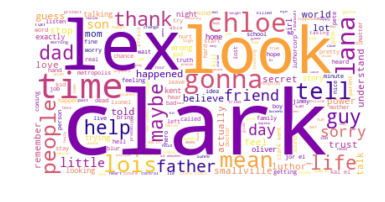

In [53]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


text = corpus[0]
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", stopwords=stopwords_set, colormap='plasma').generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

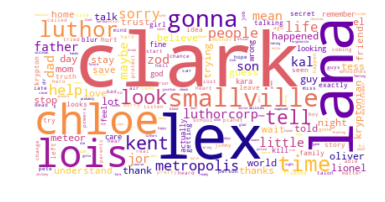

In [62]:
wordcloud = WordCloud(background_color="white", stopwords=stopwords_set, colormap='plasma')
wordcloud.generate_from_frequencies(frequencies=d_freq)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()